In [1]:
import numpy as np
import matplotlib.pyplot as plt
from funciones import *

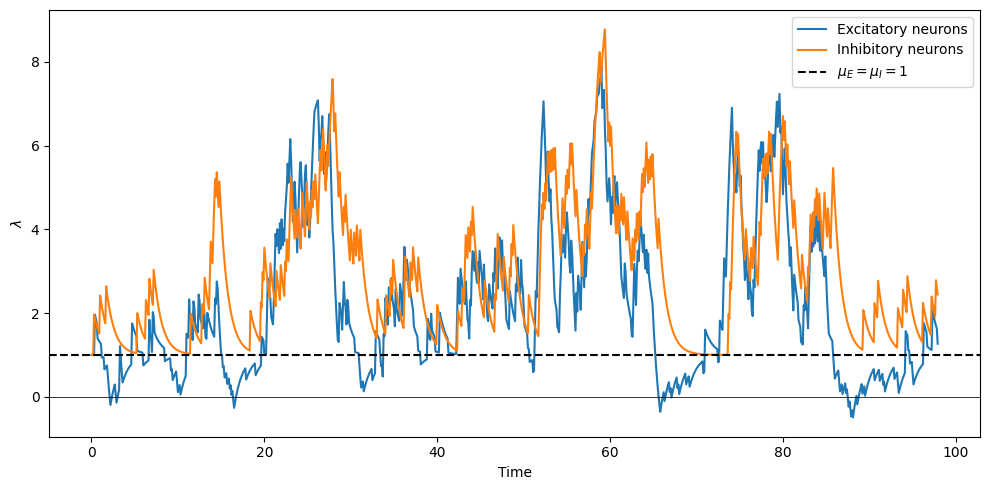

In [3]:
nmax = 10**3
N = 1000 # number of neurons
N_E = 800 # number of excitatory neurons
N_I = 200 # number of inhibitory neurons
g_E= 1.5/N # connection strength of excitatory neurons
g_I= 7.5/N # connection strength of inhibitory neurons
k = 1
mu_E = 1
mu_I = 1
tau = 1

# These parameters are similar to the ones used in Growing Critical: Self-Organized Criticality in a Developing Neural System Felipe Yaroslav Kalle Kossio
"""n_EE = 1.5*(4/5)**2
n_IE = 7.5*4/(5**2)
n_EI = 1.5*4/(5**2)
n_II = 7.5*1/(5**2)"""

n_EE = N*g_E*(N_E/N)*(N_E/N)*k
n_IE = N*g_I*(N_I/N)*(N_I/N)*k
n_EI = N*g_E*(N_E/N)*(N_E/N)*k
n_II = 0

dt = 0.1

time, t_E, t_I, rates_E, rates_I = model(nmax, mu_E, mu_I, tau, n_EE, n_IE, n_EI, n_II, dt)

fig = plt.figure(figsize=(10, 5))
plt.plot(time, rates_E, label='Excitatory neurons')
plt.plot(time, rates_I, label='Inhibitory neurons')
plt.xlabel('Time')
plt.axhline(1, label = '$\mu_E=\mu_I=1$', color = 'black', linestyle = '--')
plt.axhline(0, color = 'black',lw = 0.55)
plt.ylabel('$\lambda$')
plt.legend()
fig.tight_layout()


([], [])

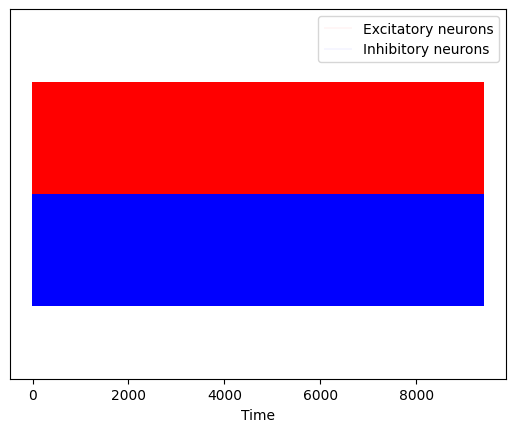

In [3]:
plt.eventplot(t_E, linelengths=0.5, linewidths=0.05, color = 'red', label = 'Excitatory neurons')
plt.eventplot(t_I, linelengths=0.5, linewidths=0.05, color = 'blue', lineoffsets= 0.5, label = 'Inhibitory neurons')
plt.xlabel('Time')
plt.ylabel('')
plt.legend()
plt.yticks([])


# Phase diagram $R=1$

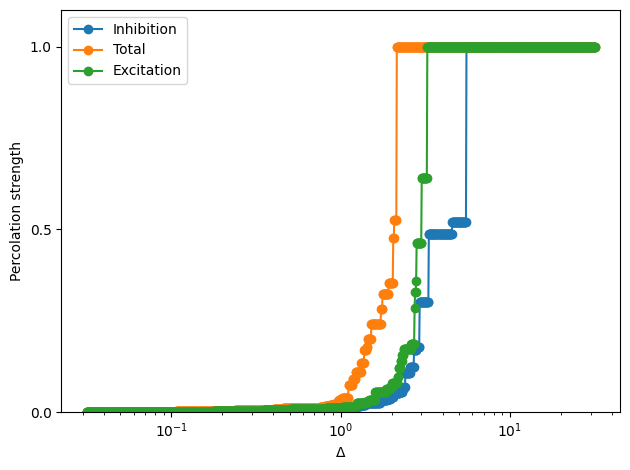

In [4]:
deltas = np.logspace(-1.5, 1.5, base= 10, num = 100)
percolation_strength_exc = calculate_percolation_strength(np.diff(t_E), deltas)
percolation_strength_inh = calculate_percolation_strength(np.diff(t_I), deltas)
t = np.concatenate((t_E, t_I))
t = np.sort(t)
percolation_strength_tot = calculate_percolation_strength(np.diff(t), deltas)
plt.plot(deltas, percolation_strength_inh, marker = 'o', label = 'Inhibition')
plt.plot(deltas, percolation_strength_tot, marker = 'o', label = 'Total')
plt.plot(deltas, percolation_strength_exc, marker = 'o', label = 'Excitation')
plt.xscale('log')
plt.ylim(0, 1.1)
plt.yticks([0, 0.5, 1])
plt.xlabel('$\Delta$')
plt.ylabel('Percolation strength')
plt.legend()

plt.tight_layout()

0
1
2
3


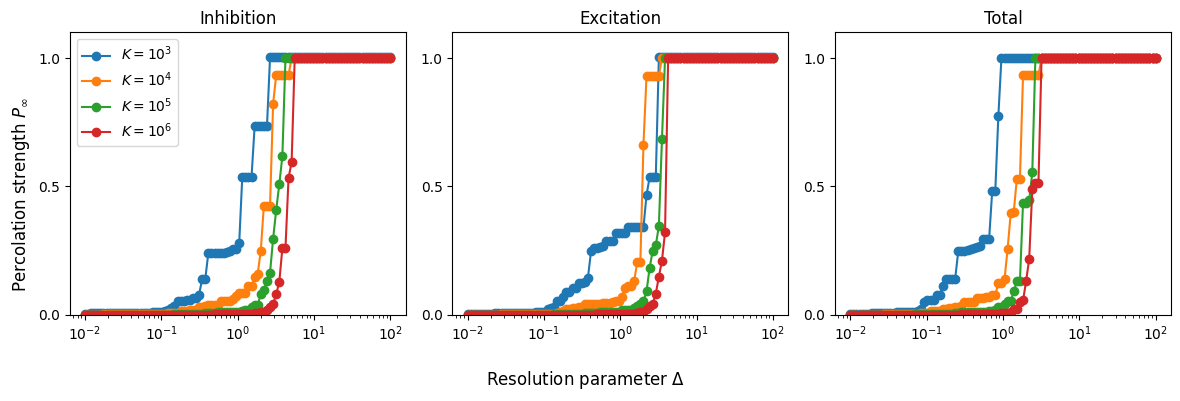

In [70]:
fig = plt.figure(figsize=(12, 4))
axgrid = fig.add_gridspec(1, 3)
labels = ['$K=10^3$','$K=10^4$','$K=10^5$','$K=10^6$']
delta = np.logspace(-2, 2, base= 10, num = 100)
ax1 = fig.add_subplot(axgrid[0, 0])
ax2 = fig.add_subplot(axgrid[0, 1])
ax3 = fig.add_subplot(axgrid[0, 2])

for i in range(4):
        nmax = 10**(i+3)
        time, t_E, t_I, rates_E, rates_I = model(nmax, mu_E, mu_I, tau, n_EE, n_IE, n_EI, n_II, dt)
        t = np.concatenate((t_E, t_I))
        t = np.sort(t)
        perc_I = calculate_percolation_strength(np.diff(t_I), delta)
        perc_E = calculate_percolation_strength(np.diff(t_E), delta)
        perc_tot = calculate_percolation_strength(np.diff(t), delta)
        ax1.plot(delta, perc_I, marker = 'o', label = labels[i])
        ax2.plot(delta, perc_E, marker = 'o', label = labels[i])
        ax3.plot(delta, perc_tot, marker = 'o', label = labels[i])
        print(i)


ax1.set_title('Inhibition')
ax2.set_title('Excitation')
ax3.set_title('Total')
ax1.set_xscale('log')
ax2.set_xscale('log')
ax3.set_xscale('log')
ax1.set_ylim(0, 1.1)
ax2.set_ylim(0, 1.1)
ax3.set_ylim(0, 1.1)
ax1.set_yticks([0, 0.5, 1])
ax2.set_yticks([0, 0.5, 1])
ax3.set_yticks([0, 0.5, 1])

fig.supylabel('Percolation strength $P_{\infty}$')
fig.supxlabel('Resolution parameter $\Delta$')
ax1.legend()

fig.tight_layout()

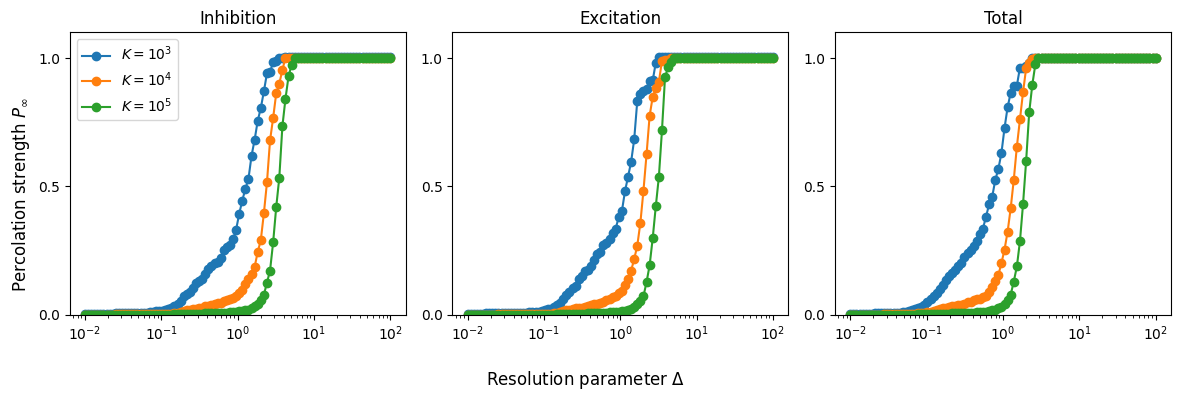

In [73]:
fig = plt.figure(figsize=(12, 4))
axgrid = fig.add_gridspec(1, 3)
labels = ['$K=10^3$','$K=10^4$','$K=10^5$','$K=10^6$']
delta = np.logspace(-2, 2, base= 10, num = 100)
ax1 = fig.add_subplot(axgrid[0, 0])
ax2 = fig.add_subplot(axgrid[0, 1])
ax3 = fig.add_subplot(axgrid[0, 2])

R = 10**3

for i in range(3):
        nmax = 10**(i+3)
        percolations_I = np.zeros((R, len(delta)))
        percolations_E = np.zeros((R, len(delta)))
        percolations_tot = np.zeros((R, len(delta)))
        for j in range(R):
                time, t_E, t_I, rates_E, rates_I = model(nmax, mu_E, mu_I, tau, n_EE, n_IE, n_EI, n_II, dt)
                t = np.concatenate((t_E, t_I))
                t = np.sort(t)
                percolations_E[j,:] = calculate_percolation_strength(np.diff(t_E), delta)
                percolations_I[j,:] = calculate_percolation_strength(np.diff(t_I), delta)
                percolations_tot[j,:] = calculate_percolation_strength(np.diff(t), delta)
        perc_I = np.mean(percolations_I, axis = 0)
        perc_E = np.mean(percolations_E, axis = 0)
        perc_tot = np.mean(percolations_tot, axis = 0)
        np.save(f'./data/model_perc_I_R={R}_K={nmax}', perc_I)
        np.save(f'./data/model_perc_E_R={R}_K={nmax}', perc_E)
        np.save(f'./data/model_perc_tot_R={R}_K={nmax}', perc_tot)
        ax1.plot(delta, perc_I, marker = 'o', label = labels[i])
        ax2.plot(delta, perc_E, marker = 'o', label = labels[i])
        ax3.plot(delta, perc_tot, marker = 'o', label = labels[i])
       

ax1.set_title('Inhibition')
ax2.set_title('Excitation')
ax3.set_title('Total')
ax1.set_xscale('log')
ax2.set_xscale('log')
ax3.set_xscale('log')
ax1.set_ylim(0, 1.1)
ax2.set_ylim(0, 1.1)
ax3.set_ylim(0, 1.1)
ax1.set_yticks([0, 0.5, 1])
ax2.set_yticks([0, 0.5, 1])
ax3.set_yticks([0, 0.5, 1])

fig.supylabel('Percolation strength $P_{\infty}$', fontsize = 16)
fig.supxlabel('Resolution parameter $\Delta$', fontsize = 16)
ax1.legend()

fig.tight_layout()

# Stats $R=1$

In [74]:
nmax = 10**5
N = 1000 # number of neurons
N_E = 800 # number of excitatory neurons
N_I = 200 # number of inhibitory neurons
g_E= 1.5/N # connection strength of excitatory neurons
g_I= 7.5/N # connection strength of inhibitory neurons
k = 1
mu_E = 1
mu_I = 1
tau = 1

# These parameters are similar to the ones used in Growing Critical: Self-Organized Criticality in a Developing Neural System Felipe Yaroslav Kalle Kossio
"""n_EE = 1.5*(4/5)**2
n_IE = 7.5*4/(5**2)
n_EI = 1.5*4/(5**2)
n_II = 7.5*1/(5**2)"""

n_EE = N*g_E*(N_E/N)*(N_E/N)*k
n_IE = N*g_I*(N_I/N)*(N_I/N)*k
n_EI = N*g_E*(N_E/N)*(N_E/N)*k
n_II = 0

dt = 0.1

time, t_E, t_I, rates_E, rates_I = model(nmax, mu_E, mu_I, tau, n_EE, n_IE, n_EI, n_II, dt)

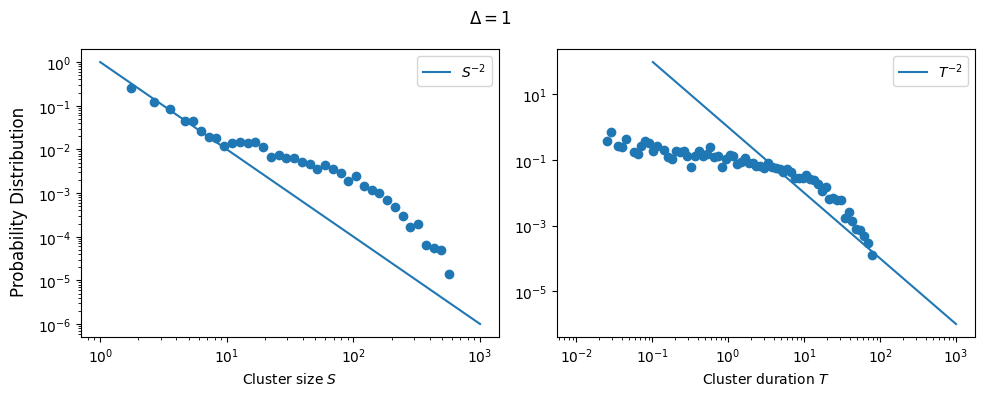

In [75]:
delta = 10**0
clusters = identify_clusters(t_E, delta)
cluster_sizes = [len(cluster) for cluster in clusters]
cluster_times = [cluster[-1] - cluster[0] for cluster in clusters]

fig = plt.figure(figsize=(10, 4))
axgrid = fig.add_gridspec(1, 2)
ax0 = fig.add_subplot(axgrid[0, 0])
ax1 = fig.add_subplot(axgrid[0, 1])

s_bins = np.logspace(0, 3, num = 50)
ys = s_bins**-2
s_hist = np.histogram(cluster_sizes, bins = s_bins, density = True)
ax0.scatter(s_bins[:-1], s_hist[0], marker = 'o')
ax0.plot(s_bins, ys, label = '$S^{-2}$')
ax0.set_xscale('log')
ax0.set_yscale('log')
ax0.set_xlabel('Cluster size $S$')
ax0.legend()

t_bins = np.logspace(-2, 3, num = 100)
yt = t_bins**-2
t_hist = np.histogram(cluster_times, bins = t_bins, density = True)
ax1.scatter(t_bins[:-1], t_hist[0], marker = 'o')
ax1.plot(t_bins[20:], yt[20:], label = '$T^{-2}$')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel('Cluster duration $T$')
ax1.legend()

fig.suptitle('$\Delta = 1$')
fig.supylabel('Probability Distribution')
plt.tight_layout()

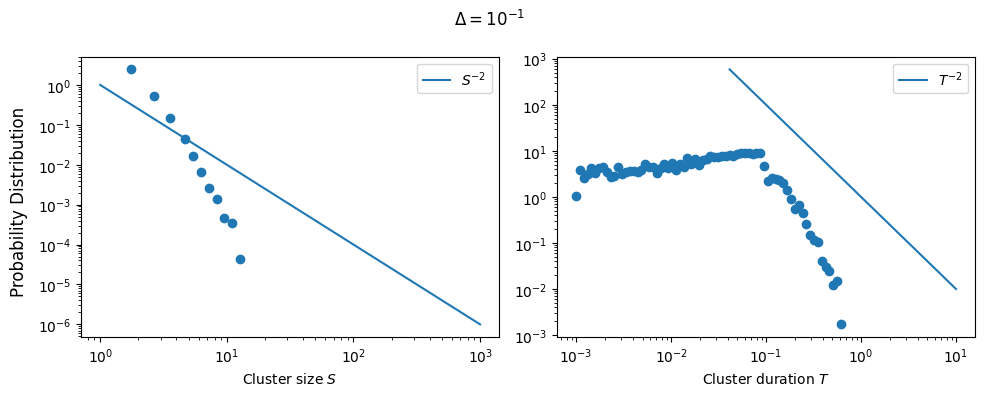

In [76]:
delta = 10**-1
clusters = identify_clusters(t_E, delta)
cluster_sizes = [len(cluster) for cluster in clusters]
cluster_times = [cluster[-1] - cluster[0] for cluster in clusters]


fig = plt.figure(figsize=(10, 4))
axgrid = fig.add_gridspec(1, 2)
ax0 = fig.add_subplot(axgrid[0, 0])
ax1 = fig.add_subplot(axgrid[0, 1])

s_bins = np.logspace(0, 3, num = 50)
ys = s_bins**-2
s_hist = np.histogram(cluster_sizes, bins = s_bins, density = True)
ax0.scatter(s_bins[:-1], s_hist[0], marker = 'o')
ax0.plot(s_bins, ys, label = '$S^{-2}$')
ax0.set_xscale('log')
ax0.set_yscale('log')
ax0.set_xlabel('Cluster size $S$')
ax0.legend()

t_bins = np.logspace(-3, 1, num = 100)
yt = t_bins**-2
t_hist = np.histogram(cluster_times, bins = t_bins, density = True)
ax1.scatter(t_bins[:-1], t_hist[0], marker = 'o')
ax1.plot(t_bins[40:], yt[40:], label = '$T^{-2}$')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel('Cluster duration $T$')
ax1.legend()

fig.suptitle('$\Delta = 10^{-1}$')
fig.supylabel('Probability Distribution')
plt.tight_layout()

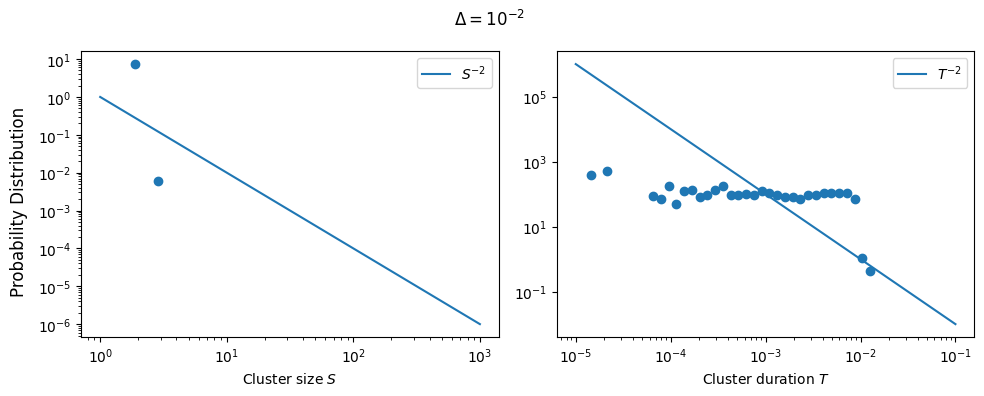

In [77]:
delta = 10**-2
clusters = identify_clusters(t_E, delta)
cluster_sizes = [len(cluster) for cluster in clusters]
cluster_times = [cluster[-1] - cluster[0] for cluster in clusters]


fig = plt.figure(figsize=(10, 4))
axgrid = fig.add_gridspec(1, 2)
ax0 = fig.add_subplot(axgrid[0, 0])
ax1 = fig.add_subplot(axgrid[0, 1])

s_bins = np.logspace(-0, 3, num = 100)
ys = s_bins**-2
s_hist = np.histogram(cluster_sizes, bins = s_bins, density = True)
ax0.scatter(s_bins[:-1], s_hist[0], marker = 'o')
ax0.plot(s_bins, ys, label = '$S^{-2}$')
ax0.set_xscale('log')
ax0.set_yscale('log')
ax0.set_xlabel('Cluster size $S$')
ax0.legend()

t_bins = np.logspace(-5, -1, num = 50)
yt = t_bins**-2*10**-4
t_hist = np.histogram(cluster_times, bins = t_bins, density = True)
ax1.scatter(t_bins[:-1], t_hist[0], marker = 'o')
ax1.plot(t_bins, yt, label = '$T^{-2}$')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel('Cluster duration $T$')
ax1.legend()

fig.suptitle('$\Delta = 10^{-2}$')
fig.supylabel('Probability Distribution')
plt.tight_layout()

# $t_I$

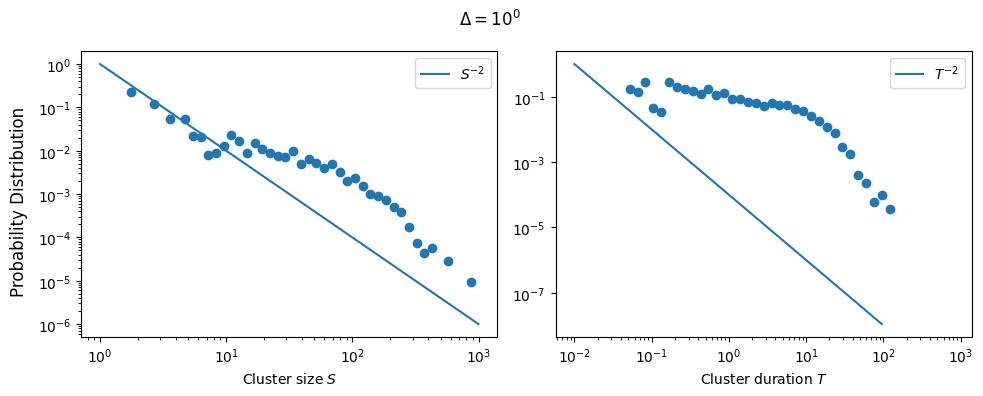

In [78]:
delta = 10**0
clusters = identify_clusters(t_I, delta)
cluster_sizes = [len(cluster) for cluster in clusters]
cluster_times = [cluster[-1] - cluster[0] for cluster in clusters]


fig = plt.figure(figsize=(10, 4))
axgrid = fig.add_gridspec(1, 2)
ax0 = fig.add_subplot(axgrid[0, 0])
ax1 = fig.add_subplot(axgrid[0, 1])

s_bins = np.logspace(-0, 3, num = 50)
ys = s_bins**-2
s_hist = np.histogram(cluster_sizes, bins = s_bins, density = True)
ax0.scatter(s_bins[:-1], s_hist[0], marker = 'o')
ax0.plot(s_bins, ys, label = '$S^{-2}$')
ax0.set_xscale('log')
ax0.set_yscale('log')
ax0.set_xlabel('Cluster size $S$')
ax0.legend()

t_bins = np.logspace(-2, 3, num = 50)
yt = t_bins**-2*10**-4
yt2 = t_bins**-1
t_hist = np.histogram(cluster_times, bins = t_bins, density = True)
ax1.scatter(t_bins[:-1], t_hist[0], marker = 'o')
ax1.plot(t_bins[:-10], yt[:-10], label = '$T^{-2}$')
#ax1.plot(t_bins, yt2, label = '$T^{-1}$')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel('Cluster duration $T$')
ax1.legend()

fig.suptitle('$\Delta = 10^{0}$')
fig.supylabel('Probability Distribution')
plt.tight_layout()

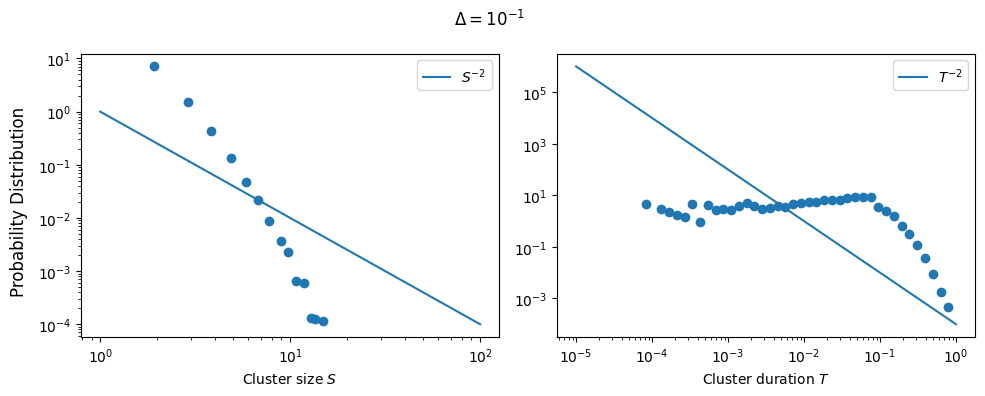

In [79]:
delta = 10**-1
clusters = identify_clusters(t_I, delta)
cluster_sizes = [len(cluster) for cluster in clusters]
cluster_times = [cluster[-1] - cluster[0] for cluster in clusters]


fig = plt.figure(figsize=(10, 4))
axgrid = fig.add_gridspec(1, 2)
ax0 = fig.add_subplot(axgrid[0, 0])
ax1 = fig.add_subplot(axgrid[0, 1])

s_bins = np.logspace(-0, 2, num = 100)
ys = s_bins**-2
s_hist = np.histogram(cluster_sizes, bins = s_bins, density = True)
ax0.scatter(s_bins[:-1], s_hist[0], marker = 'o')
ax0.plot(s_bins, ys, label = '$S^{-2}$')
ax0.set_xscale('log')
ax0.set_yscale('log')
ax0.set_xlabel('Cluster size $S$')
ax0.legend()

t_bins = np.logspace(-5, 0, num = 50)
yt = t_bins**-2*10**-4
t_hist = np.histogram(cluster_times, bins = t_bins, density = True)
ax1.scatter(t_bins[:-1], t_hist[0], marker = 'o')
ax1.plot(t_bins, yt, label = '$T^{-2}$')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel('Cluster duration $T$')
ax1.legend()

fig.suptitle('$\Delta = 10^{-1}$')
fig.supylabel('Probability Distribution')
plt.tight_layout()

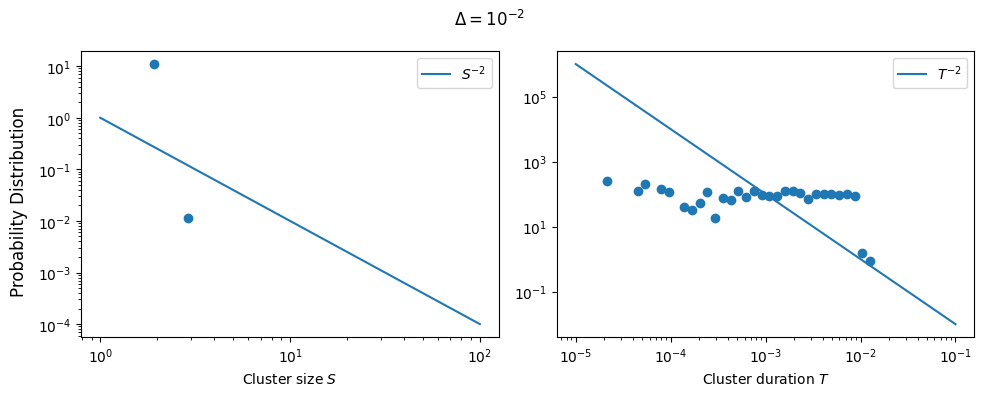

In [80]:
delta = 10**-2
clusters = identify_clusters(t_I, delta)
cluster_sizes = [len(cluster) for cluster in clusters]
cluster_times = [cluster[-1] - cluster[0] for cluster in clusters]


fig = plt.figure(figsize=(10, 4))
axgrid = fig.add_gridspec(1, 2)
ax0 = fig.add_subplot(axgrid[0, 0])
ax1 = fig.add_subplot(axgrid[0, 1])

s_bins = np.logspace(0, 2, num = 100)
ys = s_bins**-2
s_hist = np.histogram(cluster_sizes, bins = s_bins, density = True)
ax0.scatter(s_bins[:-1], s_hist[0], marker = 'o')
ax0.plot(s_bins, ys, label = '$S^{-2}$')
ax0.set_xscale('log')
ax0.set_yscale('log')
ax0.set_xlabel('Cluster size $S$')
ax0.legend()

t_bins = np.logspace(-5, -1, num = 50)
yt = t_bins**-2*10**-4
t_hist = np.histogram(cluster_times, bins = t_bins, density = True)
ax1.scatter(t_bins[:-1], t_hist[0], marker = 'o')
ax1.plot(t_bins, yt, label = '$T^{-2}$')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel('Cluster duration $T$')
ax1.legend()

fig.suptitle('$\Delta = 10^{-2}$')
fig.supylabel('Probability Distribution')
plt.tight_layout()

# $t_{tot}$

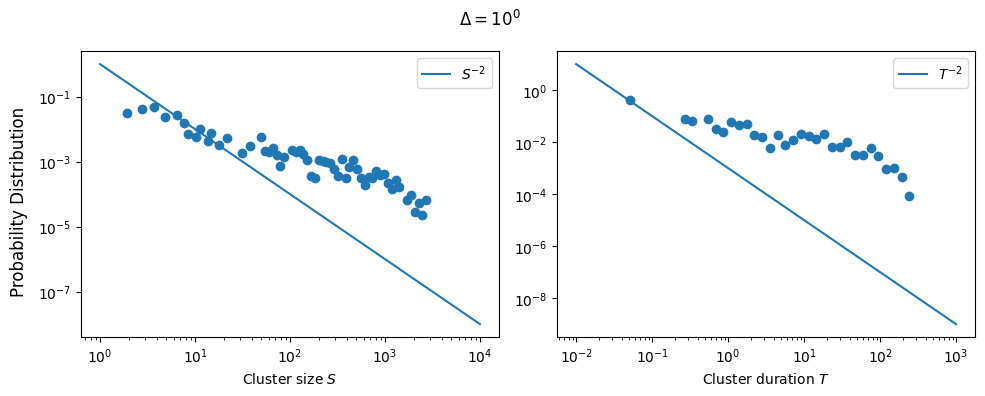

In [81]:
delta = 10**0
clusters = identify_clusters(t, delta)
cluster_sizes = [len(cluster) for cluster in clusters]
cluster_times = [cluster[-1] - cluster[0] for cluster in clusters]


fig = plt.figure(figsize=(10, 4))
axgrid = fig.add_gridspec(1, 2)
ax0 = fig.add_subplot(axgrid[0, 0])
ax1 = fig.add_subplot(axgrid[0, 1])

s_bins = np.logspace(-0, 4, num = 100)
ys = s_bins**-2
s_hist = np.histogram(cluster_sizes, bins = s_bins, density = True)
ax0.scatter(s_bins[:-1], s_hist[0], marker = 'o')
ax0.plot(s_bins, ys, label = '$S^{-2}$')
ax0.set_xscale('log')
ax0.set_yscale('log')
ax0.set_xlabel('Cluster size $S$')
ax0.legend()

t_bins = np.logspace(-2, 3, num = 50)
yt = t_bins**-2*10**-3
t_hist = np.histogram(cluster_times, bins = t_bins, density = True)
ax1.scatter(t_bins[:-1], t_hist[0], marker = 'o')
ax1.plot(t_bins, yt, label = '$T^{-2}$')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel('Cluster duration $T$')
ax1.legend()

fig.suptitle('$\Delta = 10^{0}$')
fig.supylabel('Probability Distribution')
plt.tight_layout()

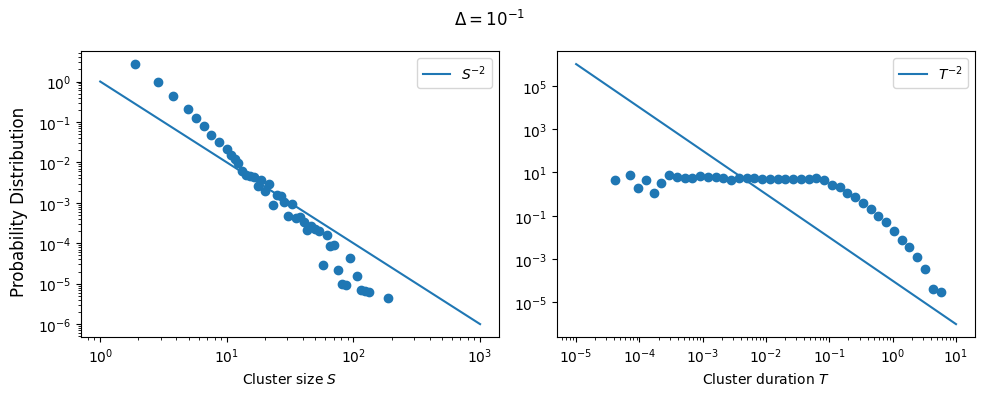

In [82]:
delta = 10**-1
clusters = identify_clusters(t, delta)
cluster_sizes = [len(cluster) for cluster in clusters]
cluster_times = [cluster[-1] - cluster[0] for cluster in clusters]


fig = plt.figure(figsize=(10, 4))
axgrid = fig.add_gridspec(1, 2)
ax0 = fig.add_subplot(axgrid[0, 0])
ax1 = fig.add_subplot(axgrid[0, 1])

s_bins = np.logspace(-0, 3, num = 100)
ys = s_bins**-2
s_hist = np.histogram(cluster_sizes, bins = s_bins, density = True)
ax0.scatter(s_bins[:-1], s_hist[0], marker = 'o')
ax0.plot(s_bins, ys, label = '$S^{-2}$')
ax0.set_xscale('log')
ax0.set_yscale('log')
ax0.set_xlabel('Cluster size $S$')
ax0.legend()

t_bins = np.logspace(-5, 1, num = 50)
yt = t_bins**-2*10**-4
t_hist = np.histogram(cluster_times, bins = t_bins, density = True)
ax1.scatter(t_bins[:-1], t_hist[0], marker = 'o')
ax1.plot(t_bins, yt, label = '$T^{-2}$')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel('Cluster duration $T$')
ax1.legend()

fig.suptitle('$\Delta = 10^{-1}$')
fig.supylabel('Probability Distribution')
plt.tight_layout()

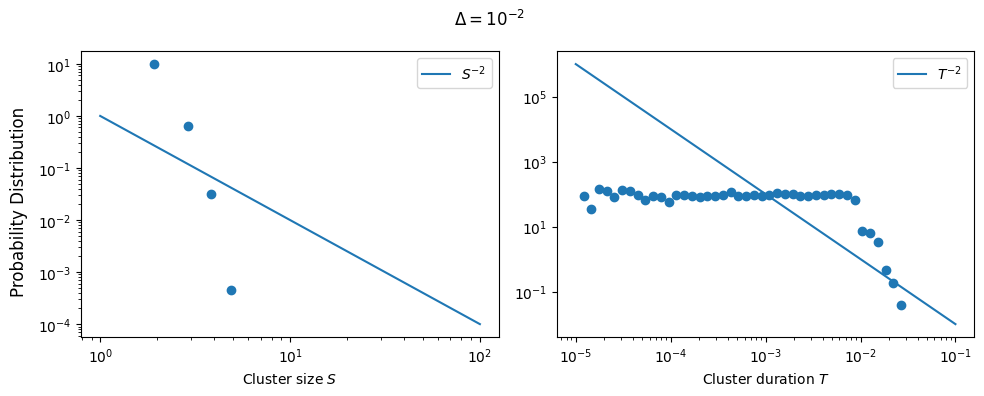

In [83]:
delta = 10**-2
clusters = identify_clusters(t, delta)
cluster_sizes = [len(cluster) for cluster in clusters]
cluster_times = [cluster[-1] - cluster[0] for cluster in clusters]


fig = plt.figure(figsize=(10, 4))
axgrid = fig.add_gridspec(1, 2)
ax0 = fig.add_subplot(axgrid[0, 0])
ax1 = fig.add_subplot(axgrid[0, 1])

s_bins = np.logspace(-0, 2, num = 100)
ys = s_bins**-2
s_hist = np.histogram(cluster_sizes, bins = s_bins, density = True)
ax0.scatter(s_bins[:-1], s_hist[0], marker = 'o')
ax0.plot(s_bins, ys, label = '$S^{-2}$')
ax0.set_xscale('log')
ax0.set_yscale('log')
ax0.set_xlabel('Cluster size $S$')
ax0.legend()

t_bins = np.logspace(-5, -1, num = 50)
yt = t_bins**-2*10**-4
t_hist = np.histogram(cluster_times, bins = t_bins, density = True)
ax1.scatter(t_bins[:-1], t_hist[0], marker = 'o')
ax1.plot(t_bins, yt, label = '$T^{-2}$')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel('Cluster duration $T$')
ax1.legend()

fig.suptitle('$\Delta = 10^{-2}$')
fig.supylabel('Probability Distribution')
plt.tight_layout()

# Run here to save data

# Phase diagram $R=10^3$

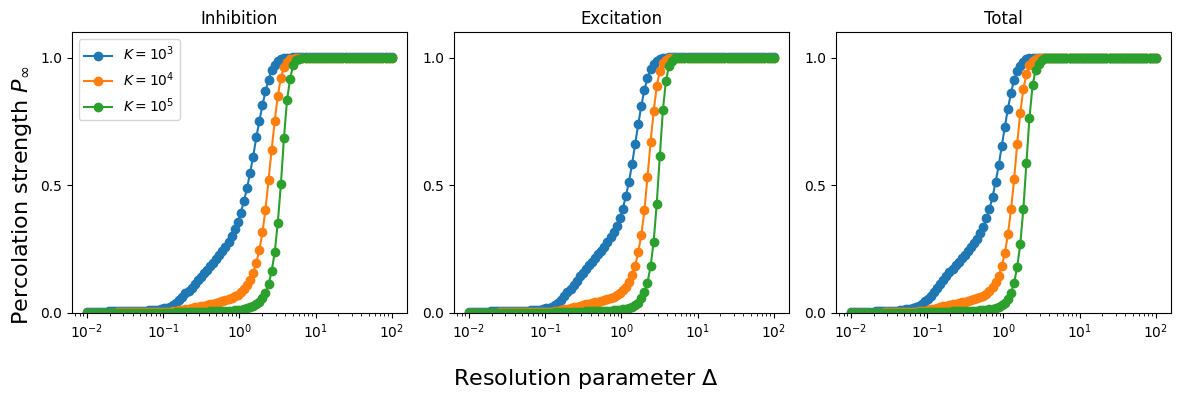

In [25]:
fig = plt.figure(figsize=(12, 4))
axgrid = fig.add_gridspec(1, 3)
labels = ['$K=10^3$','$K=10^4$','$K=10^5$','$K=10^6$']
delta = np.logspace(-2, 2, base= 10, num = 100)
ax1 = fig.add_subplot(axgrid[0, 0])
ax2 = fig.add_subplot(axgrid[0, 1])
ax3 = fig.add_subplot(axgrid[0, 2])

R = 10**3

for i in range(3):
        nmax = 10**(i+3)
        percolations_I = np.zeros((R, len(delta)))
        percolations_E = np.zeros((R, len(delta)))
        percolations_tot = np.zeros((R, len(delta)))
        for j in range(R):
                time, t_E, t_I, rates_E, rates_I = model(nmax, mu_E, mu_I, tau, n_EE, n_IE, n_EI, n_II, dt)
                t = np.concatenate((t_E, t_I))
                t = np.sort(t)
                percolations_E[j,:] = calculate_percolation_strength(np.diff(t_E), delta)
                percolations_I[j,:] = calculate_percolation_strength(np.diff(t_I), delta)
                percolations_tot[j,:] = calculate_percolation_strength(np.diff(t), delta)
        perc_I = np.mean(percolations_I, axis = 0)
        perc_E = np.mean(percolations_E, axis = 0)
        perc_tot = np.mean(percolations_tot, axis = 0)
        np.save(f'./data/model_perc_I_R={R}_K={nmax}', perc_I)
        np.save(f'./data/model_perc_E_R={R}_K={nmax}', perc_E)
        np.save(f'./data/model_perc_tot_R={R}_K={nmax}', perc_tot)
        ax1.plot(delta, perc_I, marker = 'o', label = labels[i])
        ax2.plot(delta, perc_E, marker = 'o', label = labels[i])
        ax3.plot(delta, perc_tot, marker = 'o', label = labels[i])
       

ax1.set_title('Inhibition')
ax2.set_title('Excitation')
ax3.set_title('Total')
ax1.set_xscale('log')
ax2.set_xscale('log')
ax3.set_xscale('log')
ax1.set_ylim(0, 1.1)
ax2.set_ylim(0, 1.1)
ax3.set_ylim(0, 1.1)
ax1.set_yticks([0, 0.5, 1])
ax2.set_yticks([0, 0.5, 1])
ax3.set_yticks([0, 0.5, 1])

fig.supylabel('Percolation strength $P_{\infty}$', fontsize = 16)
fig.supxlabel('Resolution parameter $\Delta$', fontsize = 16)
ax1.legend()

fig.tight_layout()

# Stats $R=10^3$

#### save data

In [2]:
def identify_clusters_model(times, delta):
    """
    Identifies clusters in a temporal series given a resolution parameter delta
    Computes the size and duration of clusters
    
    ## Inputs:
    times: temporal series
    delta: resolution parameter

    ## Output:
    clusters: list of clusters
    clusters_sizes: list of sizes of clusters
    clusters_times: list of durations of clusters
    """
    clusters = []
    current_cluster = []
    for i in range(len(times) - 1):
        if times[i + 1] - times[i] <= delta:
            if not current_cluster:
                current_cluster.append(times[i])
            current_cluster.append(times[i + 1])
        else:
            if current_cluster:
                clusters.append(current_cluster)
                current_cluster = []
    
    clusters_sizes = [len(cluster) for cluster in clusters]
    clusters_times = [cluster[-1] - cluster[0] for cluster in clusters]
    return clusters, clusters_sizes, clusters_times

# $\Delta = 1$

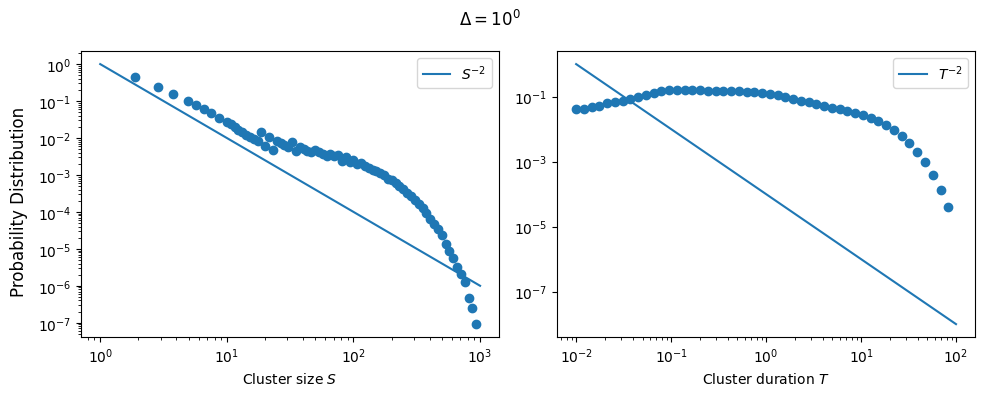

In [27]:
R = 10**3
nmax = 10**5
all_clusters_sizes_E = []
all_clusters_times_E = []
all_clusters_sizes_I = []
all_clusters_times_I = []
all_clusters_sizes_tot = []
all_clusters_times_tot = []

delta = 10**0

for _ in range(R):
        time, t_E, t_I, rates_E, rates_I = model(nmax, mu_E, mu_I, tau, n_EE, n_IE, n_EI, n_II, dt)
        t = np.concatenate((t_E, t_I))
        t = np.sort(t)
        _, cluster_sizes_E, cluster_times_E  = identify_clusters_model(t_E, delta)
        all_clusters_sizes_E.extend(cluster_sizes_E)
        all_clusters_times_E.extend(cluster_times_E)
        _, cluster_sizes_I, cluster_times_I  = identify_clusters_model(t_E, delta)
        all_clusters_sizes_I.extend(cluster_sizes_I)
        all_clusters_times_I.extend(cluster_times_I)
        _, cluster_sizes_t, cluster_times_t  = identify_clusters_model(t_E, delta)
        all_clusters_sizes_tot.extend(cluster_sizes_t)
        all_clusters_times_tot.extend(cluster_times_t)

fig = plt.figure(figsize=(10, 4))
axgrid = fig.add_gridspec(1, 2)
ax0 = fig.add_subplot(axgrid[0, 0])
ax1 = fig.add_subplot(axgrid[0, 1])

s_bins = np.logspace(0, 3, num = 100)
ys = s_bins**-2
s_hist = np.histogram(all_clusters_sizes_tot, bins = s_bins, density = True)
ax0.scatter(s_bins[:-1], s_hist[0], marker = 'o')
ax0.plot(s_bins, ys, label = '$S^{-2}$')
ax0.set_xscale('log')
ax0.set_yscale('log')
ax0.set_xlabel('Cluster size $S$')
ax0.legend()

t_bins = np.logspace(-2, 2, num = 50)
yt = t_bins**-2*10**-4
t_hist = np.histogram(all_clusters_times_tot, bins = t_bins, density = True)
ax1.scatter(t_bins[:-1], t_hist[0], marker = 'o')
ax1.plot(t_bins, yt, label = '$T^{-2}$')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel('Cluster duration $T$')
ax1.legend()

fig.suptitle('$\Delta = 10^{0}$')
fig.supylabel('Probability Distribution')
plt.tight_layout()

np.save(f'./data/model_cluster_sizes_E_R={R}_K={nmax}_delta={delta:.0E}', all_clusters_sizes_E)
np.save(f'./data/model_cluster_times_E_R={R}_K={nmax}_delta={delta:.0E}', all_clusters_times_E)
np.save(f'./data/model_cluster_sizes_I_R={R}_K={nmax}_delta={delta:.0E}', all_clusters_sizes_I)
np.save(f'./data/model_cluster_times_I_R={R}_K={nmax}_delta={delta:.0E}', all_clusters_times_I)
np.save(f'./data/model_cluster_sizes_tot_R={R}_K={nmax}_delta={delta:.0E}', all_clusters_sizes_tot)
np.save(f'./data/model_cluster_times_tot_R={R}_K={nmax}_delta={delta:.0E}', all_clusters_times_tot)

# $\Delta = 10^{-1}$

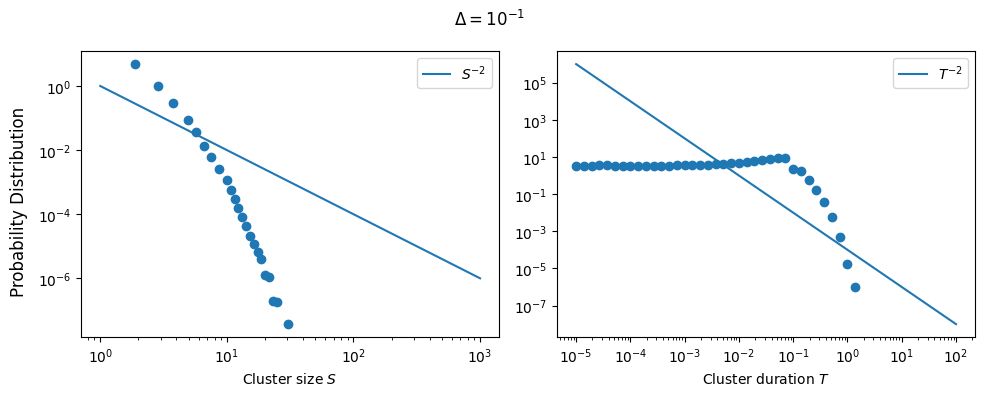

In [11]:
R = 10**3
nmax = 10**5
all_clusters_sizes_E = []
all_clusters_times_E = []
all_clusters_sizes_I = []
all_clusters_times_I = []
all_clusters_sizes_tot = []
all_clusters_times_tot = []

delta = 10**-1

for _ in range(R):
        time, t_E, t_I, rates_E, rates_I = model(nmax, mu_E, mu_I, tau, n_EE, n_IE, n_EI, n_II, dt)
        t = np.concatenate((t_E, t_I))
        t = np.sort(t)
        _, cluster_sizes_E, cluster_times_E  = identify_clusters_model(t_E, delta)
        all_clusters_sizes_E.extend(cluster_sizes_E)
        all_clusters_times_E.extend(cluster_times_E)
        _, cluster_sizes_I, cluster_times_I  = identify_clusters_model(t_E, delta)
        all_clusters_sizes_I.extend(cluster_sizes_I)
        all_clusters_times_I.extend(cluster_times_I)
        _, cluster_sizes_t, cluster_times_t  = identify_clusters_model(t_E, delta)
        all_clusters_sizes_tot.extend(cluster_sizes_t)
        all_clusters_times_tot.extend(cluster_times_t)

fig = plt.figure(figsize=(10, 4))
axgrid = fig.add_gridspec(1, 2)
ax0 = fig.add_subplot(axgrid[0, 0])
ax1 = fig.add_subplot(axgrid[0, 1])

s_bins = np.logspace(0, 3, num = 100)
ys = s_bins**-2
s_hist = np.histogram(all_clusters_sizes_tot, bins = s_bins, density = True)
ax0.scatter(s_bins[:-1], s_hist[0], marker = 'o')
ax0.plot(s_bins, ys, label = '$S^{-2}$')
ax0.set_xscale('log')
ax0.set_yscale('log')
ax0.set_xlabel('Cluster size $S$')
ax0.legend()

t_bins = np.logspace(-5, 2, num = 50)
yt = t_bins**-2*10**-4
t_hist = np.histogram(all_clusters_times_tot, bins = t_bins, density = True)
ax1.scatter(t_bins[:-1], t_hist[0], marker = 'o')
ax1.plot(t_bins, yt, label = '$T^{-2}$')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel('Cluster duration $T$')
ax1.legend()

fig.suptitle('$\Delta = 10^{-1}$')
fig.supylabel('Probability Distribution')
plt.tight_layout()

np.save(f'./data/model_cluster_sizes_E_R={R}_K={nmax}_delta={delta:.0E}', all_clusters_sizes_E)
np.save(f'./data/model_cluster_times_E_R={R}_K={nmax}_delta={delta:.0E}', all_clusters_times_E)
np.save(f'./data/model_cluster_sizes_I_R={R}_K={nmax}_delta={delta:.0E}', all_clusters_sizes_I)
np.save(f'./data/model_cluster_times_I_R={R}_K={nmax}_delta={delta:.0E}', all_clusters_times_I)
np.save(f'./data/model_cluster_sizes_tot_R={R}_K={nmax}_delta={delta:.0E}', all_clusters_sizes_tot)
np.save(f'./data/model_cluster_times_tot_R={R}_K={nmax}_delta={delta:.0E}', all_clusters_times_tot)


# $\Delta = 10^{-2}$ 

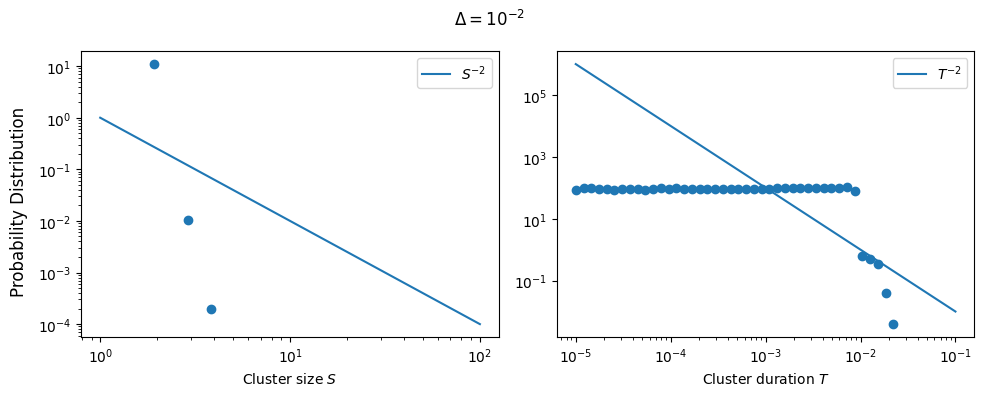

In [12]:
R = 10**3
nmax = 10**5
all_clusters_sizes_E = []
all_clusters_times_E = []
all_clusters_sizes_I = []
all_clusters_times_I = []
all_clusters_sizes_tot = []
all_clusters_times_tot = []

delta = 10**-2

for _ in range(R):
        time, t_E, t_I, rates_E, rates_I = model(nmax, mu_E, mu_I, tau, n_EE, n_IE, n_EI, n_II, dt)
        t = np.concatenate((t_E, t_I))
        t = np.sort(t)
        _, cluster_sizes_E, cluster_times_E  = identify_clusters_model(t_E, delta)
        all_clusters_sizes_E.extend(cluster_sizes_E)
        all_clusters_times_E.extend(cluster_times_E)
        _, cluster_sizes_I, cluster_times_I  = identify_clusters_model(t_E, delta)
        all_clusters_sizes_I.extend(cluster_sizes_I)
        all_clusters_times_I.extend(cluster_times_I)
        _, cluster_sizes_t, cluster_times_t  = identify_clusters_model(t_E, delta)
        all_clusters_sizes_tot.extend(cluster_sizes_t)
        all_clusters_times_tot.extend(cluster_times_t)

fig = plt.figure(figsize=(10, 4))
axgrid = fig.add_gridspec(1, 2)
ax0 = fig.add_subplot(axgrid[0, 0])
ax1 = fig.add_subplot(axgrid[0, 1])

s_bins = np.logspace(0, 2, num = 100)
ys = s_bins**-2
s_hist = np.histogram(all_clusters_sizes_tot, bins = s_bins, density = True)
ax0.scatter(s_bins[:-1], s_hist[0], marker = 'o')
ax0.plot(s_bins, ys, label = '$S^{-2}$')
ax0.set_xscale('log')
ax0.set_yscale('log')
ax0.set_xlabel('Cluster size $S$')
ax0.legend()

t_bins = np.logspace(-5, -1, num = 50)
yt = t_bins**-2*10**-4
t_hist = np.histogram(all_clusters_times_tot, bins = t_bins, density = True)
ax1.scatter(t_bins[:-1], t_hist[0], marker = 'o')
ax1.plot(t_bins, yt, label = '$T^{-2}$')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel('Cluster duration $T$')
ax1.legend()

fig.suptitle('$\Delta = 10^{-2}$')
fig.supylabel('Probability Distribution')
plt.tight_layout()

np.save(f'./data/model_cluster_sizes_E_R={R}_K={nmax}_delta={delta:.0E}', all_clusters_sizes_E)
np.save(f'./data/model_cluster_times_E_R={R}_K={nmax}_delta={delta:.0E}', all_clusters_times_E)
np.save(f'./data/model_cluster_sizes_I_R={R}_K={nmax}_delta={delta:.0E}', all_clusters_sizes_I)
np.save(f'./data/model_cluster_times_I_R={R}_K={nmax}_delta={delta:.0E}', all_clusters_times_I)
np.save(f'./data/model_cluster_sizes_tot_R={R}_K={nmax}_delta={delta:.0E}', all_clusters_sizes_tot)
np.save(f'./data/model_cluster_times_tot_R={R}_K={nmax}_delta={delta:.0E}', all_clusters_times_tot)


# $\Delta = 2$

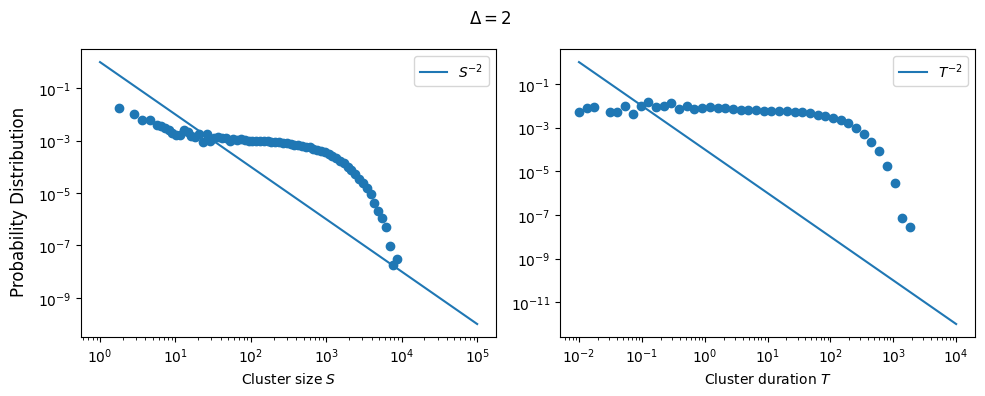

In [12]:
R = 10**3
nmax = 10**5
all_clusters_sizes_E = []
all_clusters_times_E = []
all_clusters_sizes_I = []
all_clusters_times_I = []
all_clusters_sizes_tot = []
all_clusters_times_tot = []

delta = 2

for _ in range(R):
        time, t_E, t_I, rates_E, rates_I = model(nmax, mu_E, mu_I, tau, n_EE, n_IE, n_EI, n_II, dt)
        t = np.concatenate((t_E, t_I))
        t = np.sort(t)
        _, cluster_sizes_E, cluster_times_E  = identify_clusters_model(t_E, delta)
        all_clusters_sizes_E.extend(cluster_sizes_E)
        all_clusters_times_E.extend(cluster_times_E)
        _, cluster_sizes_I, cluster_times_I  = identify_clusters_model(t_E, delta)
        all_clusters_sizes_I.extend(cluster_sizes_I)
        all_clusters_times_I.extend(cluster_times_I)
        _, cluster_sizes_t, cluster_times_t  = identify_clusters_model(t_E, delta)
        all_clusters_sizes_tot.extend(cluster_sizes_t)
        all_clusters_times_tot.extend(cluster_times_t)

fig = plt.figure(figsize=(10, 4))
axgrid = fig.add_gridspec(1, 2)
ax0 = fig.add_subplot(axgrid[0, 0])
ax1 = fig.add_subplot(axgrid[0, 1])

s_bins = np.logspace(0, 5, num = 100)
ys = s_bins**-2
s_hist = np.histogram(all_clusters_sizes_tot, bins = s_bins, density = True)
ax0.scatter(s_bins[:-1], s_hist[0], marker = 'o')
ax0.plot(s_bins, ys, label = '$S^{-2}$')
ax0.set_xscale('log')
ax0.set_yscale('log')
ax0.set_xlabel('Cluster size $S$')
ax0.legend()

t_bins = np.logspace(-2, 4, num = 50)
yt = t_bins**-2*10**-4
t_hist = np.histogram(all_clusters_times_tot, bins = t_bins, density = True)
ax1.scatter(t_bins[:-1], t_hist[0], marker = 'o')
ax1.plot(t_bins, yt, label = '$T^{-2}$')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel('Cluster duration $T$')
ax1.legend()

fig.suptitle('$\Delta = 2$')
fig.supylabel('Probability Distribution')
plt.tight_layout()

np.save(f'./data/model_cluster_sizes_E_R={R}_K={nmax}_delta={delta:.0E}', all_clusters_sizes_E)
np.save(f'./data/model_cluster_times_E_R={R}_K={nmax}_delta={delta:.0E}', all_clusters_times_E)
np.save(f'./data/model_cluster_sizes_I_R={R}_K={nmax}_delta={delta:.0E}', all_clusters_sizes_I)
np.save(f'./data/model_cluster_times_I_R={R}_K={nmax}_delta={delta:.0E}', all_clusters_times_I)
np.save(f'./data/model_cluster_sizes_tot_R={R}_K={nmax}_delta={delta:.0E}', all_clusters_sizes_tot)
np.save(f'./data/model_cluster_times_tot_R={R}_K={nmax}_delta={delta:.0E}', all_clusters_times_tot)


# $\Delta = 3$

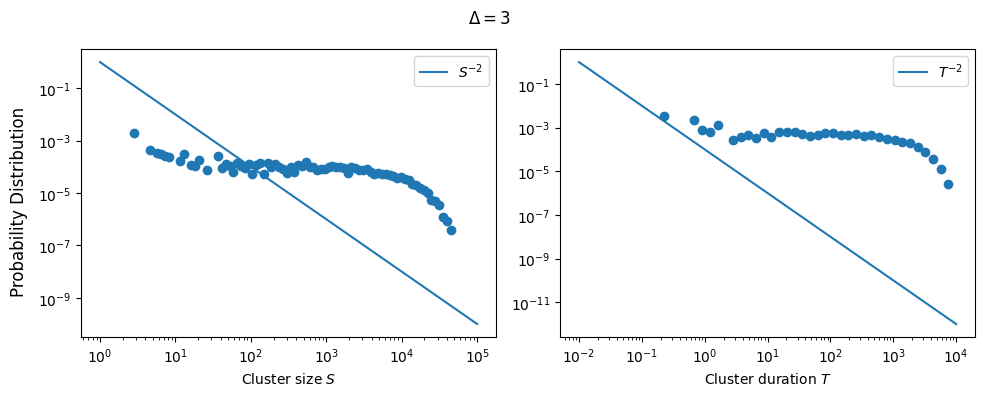

In [14]:
R = 10**3
nmax = 10**5
all_clusters_sizes_E = []
all_clusters_times_E = []
all_clusters_sizes_I = []
all_clusters_times_I = []
all_clusters_sizes_tot = []
all_clusters_times_tot = []

delta = 3

for _ in range(R):
        time, t_E, t_I, rates_E, rates_I = model(nmax, mu_E, mu_I, tau, n_EE, n_IE, n_EI, n_II, dt)
        t = np.concatenate((t_E, t_I))
        t = np.sort(t)
        _, cluster_sizes_E, cluster_times_E  = identify_clusters_model(t_E, delta)
        all_clusters_sizes_E.extend(cluster_sizes_E)
        all_clusters_times_E.extend(cluster_times_E)
        _, cluster_sizes_I, cluster_times_I  = identify_clusters_model(t_E, delta)
        all_clusters_sizes_I.extend(cluster_sizes_I)
        all_clusters_times_I.extend(cluster_times_I)
        _, cluster_sizes_t, cluster_times_t  = identify_clusters_model(t_E, delta)
        all_clusters_sizes_tot.extend(cluster_sizes_t)
        all_clusters_times_tot.extend(cluster_times_t)

fig = plt.figure(figsize=(10, 4))
axgrid = fig.add_gridspec(1, 2)
ax0 = fig.add_subplot(axgrid[0, 0])
ax1 = fig.add_subplot(axgrid[0, 1])

s_bins = np.logspace(0, 5, num = 100)
ys = s_bins**-2
s_hist = np.histogram(all_clusters_sizes_tot, bins = s_bins, density = True)
ax0.scatter(s_bins[:-1], s_hist[0], marker = 'o')
ax0.plot(s_bins, ys, label = '$S^{-2}$')
ax0.set_xscale('log')
ax0.set_yscale('log')
ax0.set_xlabel('Cluster size $S$')
ax0.legend()

t_bins = np.logspace(-2, 4, num = 50)
yt = t_bins**-2*10**-4
t_hist = np.histogram(all_clusters_times_tot, bins = t_bins, density = True)
ax1.scatter(t_bins[:-1], t_hist[0], marker = 'o')
ax1.plot(t_bins, yt, label = '$T^{-2}$')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel('Cluster duration $T$')
ax1.legend()

fig.suptitle('$\Delta = 3$')
fig.supylabel('Probability Distribution')
plt.tight_layout()

np.save(f'./data/model_cluster_sizes_E_R={R}_K={nmax}_delta={delta:.0E}', all_clusters_sizes_E)
np.save(f'./data/model_cluster_times_E_R={R}_K={nmax}_delta={delta:.0E}', all_clusters_times_E)
np.save(f'./data/model_cluster_sizes_I_R={R}_K={nmax}_delta={delta:.0E}', all_clusters_sizes_I)
np.save(f'./data/model_cluster_times_I_R={R}_K={nmax}_delta={delta:.0E}', all_clusters_times_I)
np.save(f'./data/model_cluster_sizes_tot_R={R}_K={nmax}_delta={delta:.0E}', all_clusters_sizes_tot)
np.save(f'./data/model_cluster_times_tot_R={R}_K={nmax}_delta={delta:.0E}', all_clusters_times_tot)


# $\Delta = 4$

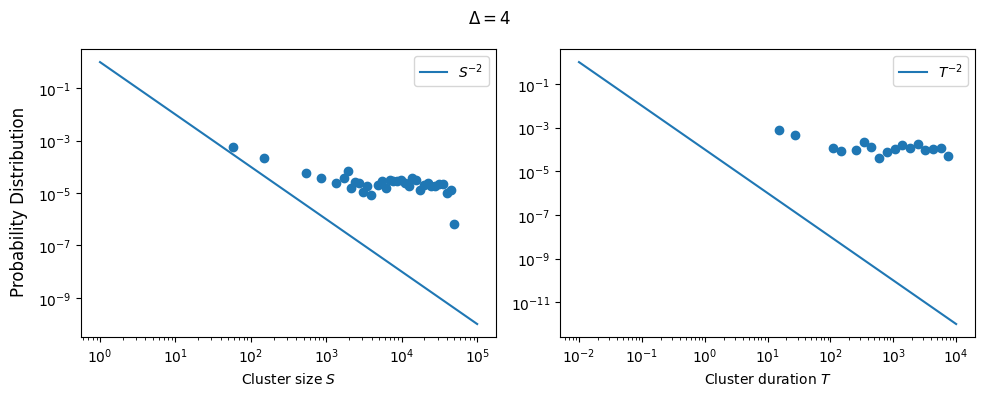

In [15]:
R = 10**3
nmax = 10**5
all_clusters_sizes_E = []
all_clusters_times_E = []
all_clusters_sizes_I = []
all_clusters_times_I = []
all_clusters_sizes_tot = []
all_clusters_times_tot = []

delta = 4

for _ in range(R):
        time, t_E, t_I, rates_E, rates_I = model(nmax, mu_E, mu_I, tau, n_EE, n_IE, n_EI, n_II, dt)
        t = np.concatenate((t_E, t_I))
        t = np.sort(t)
        _, cluster_sizes_E, cluster_times_E  = identify_clusters_model(t_E, delta)
        all_clusters_sizes_E.extend(cluster_sizes_E)
        all_clusters_times_E.extend(cluster_times_E)
        _, cluster_sizes_I, cluster_times_I  = identify_clusters_model(t_E, delta)
        all_clusters_sizes_I.extend(cluster_sizes_I)
        all_clusters_times_I.extend(cluster_times_I)
        _, cluster_sizes_t, cluster_times_t  = identify_clusters_model(t_E, delta)
        all_clusters_sizes_tot.extend(cluster_sizes_t)
        all_clusters_times_tot.extend(cluster_times_t)

fig = plt.figure(figsize=(10, 4))
axgrid = fig.add_gridspec(1, 2)
ax0 = fig.add_subplot(axgrid[0, 0])
ax1 = fig.add_subplot(axgrid[0, 1])

s_bins = np.logspace(0, 5, num = 100)
ys = s_bins**-2
s_hist = np.histogram(all_clusters_sizes_tot, bins = s_bins, density = True)
ax0.scatter(s_bins[:-1], s_hist[0], marker = 'o')
ax0.plot(s_bins, ys, label = '$S^{-2}$')
ax0.set_xscale('log')
ax0.set_yscale('log')
ax0.set_xlabel('Cluster size $S$')
ax0.legend()

t_bins = np.logspace(-2, 4, num = 50)
yt = t_bins**-2*10**-4
t_hist = np.histogram(all_clusters_times_tot, bins = t_bins, density = True)
ax1.scatter(t_bins[:-1], t_hist[0], marker = 'o')
ax1.plot(t_bins, yt, label = '$T^{-2}$')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel('Cluster duration $T$')
ax1.legend()

fig.suptitle('$\Delta = 4$')
fig.supylabel('Probability Distribution')
plt.tight_layout()

np.save(f'./data/model_cluster_sizes_E_R={R}_K={nmax}_delta={delta:.0E}', all_clusters_sizes_E)
np.save(f'./data/model_cluster_times_E_R={R}_K={nmax}_delta={delta:.0E}', all_clusters_times_E)
np.save(f'./data/model_cluster_sizes_I_R={R}_K={nmax}_delta={delta:.0E}', all_clusters_sizes_I)
np.save(f'./data/model_cluster_times_I_R={R}_K={nmax}_delta={delta:.0E}', all_clusters_times_I)
np.save(f'./data/model_cluster_sizes_tot_R={R}_K={nmax}_delta={delta:.0E}', all_clusters_sizes_tot)
np.save(f'./data/model_cluster_times_tot_R={R}_K={nmax}_delta={delta:.0E}', all_clusters_times_tot)


# $\Delta = 5$

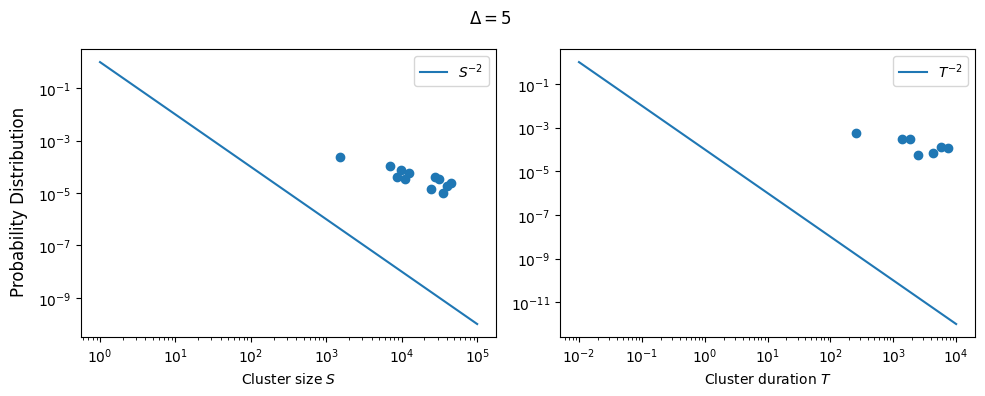

In [16]:
R = 10**3
nmax = 10**5
all_clusters_sizes_E = []
all_clusters_times_E = []
all_clusters_sizes_I = []
all_clusters_times_I = []
all_clusters_sizes_tot = []
all_clusters_times_tot = []

delta = 5

for _ in range(R):
        time, t_E, t_I, rates_E, rates_I = model(nmax, mu_E, mu_I, tau, n_EE, n_IE, n_EI, n_II, dt)
        t = np.concatenate((t_E, t_I))
        t = np.sort(t)
        _, cluster_sizes_E, cluster_times_E  = identify_clusters_model(t_E, delta)
        all_clusters_sizes_E.extend(cluster_sizes_E)
        all_clusters_times_E.extend(cluster_times_E)
        _, cluster_sizes_I, cluster_times_I  = identify_clusters_model(t_E, delta)
        all_clusters_sizes_I.extend(cluster_sizes_I)
        all_clusters_times_I.extend(cluster_times_I)
        _, cluster_sizes_t, cluster_times_t  = identify_clusters_model(t_E, delta)
        all_clusters_sizes_tot.extend(cluster_sizes_t)
        all_clusters_times_tot.extend(cluster_times_t)

fig = plt.figure(figsize=(10, 4))
axgrid = fig.add_gridspec(1, 2)
ax0 = fig.add_subplot(axgrid[0, 0])
ax1 = fig.add_subplot(axgrid[0, 1])

s_bins = np.logspace(0, 5, num = 100)
ys = s_bins**-2
s_hist = np.histogram(all_clusters_sizes_tot, bins = s_bins, density = True)
ax0.scatter(s_bins[:-1], s_hist[0], marker = 'o')
ax0.plot(s_bins, ys, label = '$S^{-2}$')
ax0.set_xscale('log')
ax0.set_yscale('log')
ax0.set_xlabel('Cluster size $S$')
ax0.legend()

t_bins = np.logspace(-2, 4, num = 50)
yt = t_bins**-2*10**-4
t_hist = np.histogram(all_clusters_times_tot, bins = t_bins, density = True)
ax1.scatter(t_bins[:-1], t_hist[0], marker = 'o')
ax1.plot(t_bins, yt, label = '$T^{-2}$')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel('Cluster duration $T$')
ax1.legend()

fig.suptitle('$\Delta = 5$')
fig.supylabel('Probability Distribution')
plt.tight_layout()

np.save(f'./data/model_cluster_sizes_E_R={R}_K={nmax}_delta={delta:.0E}', all_clusters_sizes_E)
np.save(f'./data/model_cluster_times_E_R={R}_K={nmax}_delta={delta:.0E}', all_clusters_times_E)
np.save(f'./data/model_cluster_sizes_I_R={R}_K={nmax}_delta={delta:.0E}', all_clusters_sizes_I)
np.save(f'./data/model_cluster_times_I_R={R}_K={nmax}_delta={delta:.0E}', all_clusters_times_I)
np.save(f'./data/model_cluster_sizes_tot_R={R}_K={nmax}_delta={delta:.0E}', all_clusters_sizes_tot)
np.save(f'./data/model_cluster_times_tot_R={R}_K={nmax}_delta={delta:.0E}', all_clusters_times_tot)
